####Ví dụ 1

In [58]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(2)
means = [[2, 2], [4, 2]]
cov = [[.3, .2], [.2, .3]]
N = 30
X0 = np.random.multivariate_normal(means[0], cov, N).T
X1 = np.random.multivariate_normal(means[1], cov, N).T
X = np.concatenate((X0, X1), axis = 1)
y = np.concatenate((np.ones((1, N)), -1*np.ones((1, N))), axis = 1)
# Xbar
X = np.concatenate((np.ones((1, 2*N)), X), axis = 0)

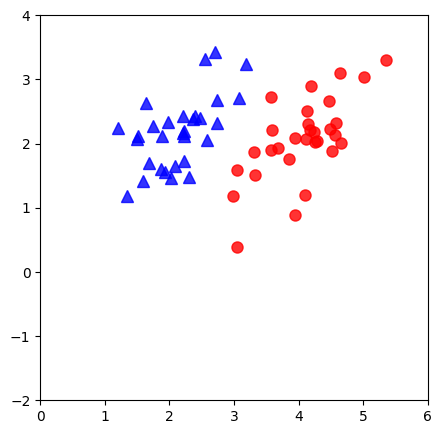

In [59]:
fig, ax = plt.subplots(figsize=(5, 5))
ani = plt.cla()
#plot points
ani = plt.plot(X0[0, :], X0[1, :], 'b^', markersize = 8, alpha = .8)
ani = plt.plot(X1[0, :], X1[1, :], 'ro', markersize = 8, alpha = .8)
ani = plt.axis([0 , 6, -2, 4])
plt.show()

In [60]:
# Define h_w(x):= W^T.x + w_0 = \bar{W}^T . \bar{x}
def h(w, x):
  return np.sign(np.dot(w.T, x))
#Stop condition
def has_converged(X, y, w):
  return np.array_equal(h(w, X), y) #True if h(w, X) == y else False
def perceptron(X, y, w_init):
  w = [w_init]
  N = X.shape[1]
  mis_points = [] # set of miss position points
  while True:
# mix data
    mix_id = np.random.permutation(N)
    for i in range(N):
      xi = X[:, mix_id[i]].reshape(3, 1)
      yi = y[0, mix_id[i]]
      if h(w[-1], xi)[0] != yi:
        mis_points.append(mix_id[i])
        w_new = w[-1] + yi*xi
        w.append(w_new)
    if has_converged(X, y, w[-1]):
      break
    return (w, mis_points)

In [61]:
d = X.shape[0]
w_init = np.random.randn(d, 1)
(w, m) = perceptron(X, y, w_init)
print(w[-1])

[[ 2.97858527]
 [-4.88723932]
 [ 6.35876079]]


In [62]:
def draw_line(w):
  w0, w1, w2 = w[0], w[1], w[2]
  if w2 != 0:
    x11, x12 = -100, 100
    return plt.plot([x11, x12], [-(w1*x11 + w0)/w2, -(w1*x12 + w0)/w2], 'k')
  else:
    x10 = -w0/w1
  return plt.plot([x10, x10], [-100, 100], 'k')

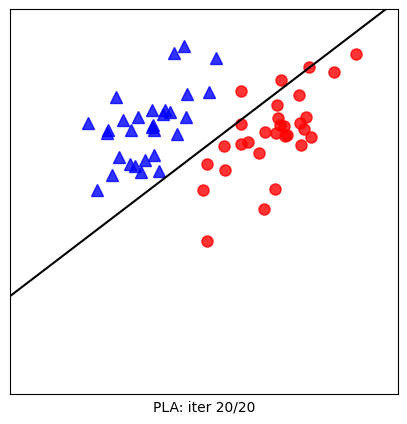

In [63]:
## Visualization
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
def viz_alg_1d_2(w):
  it = len(w)
  fig, ax = plt.subplots(figsize=(5, 5))
  def update(i):
    ani = plt.cla()
    #points
    ani = plt.plot(X0[0, :], X0[1, :], 'b^', markersize = 8, alpha = .8)
    ani = plt.plot(X1[0, :], X1[1, :], 'ro', markersize = 8, alpha = .8)
    ani = plt.axis([0 , 6, -2, 4])
    i2 = i if i < it else it-1
    ani = draw_line(w[i2])
    if i < it-1:
      # draw one misclassified point
      circle = plt.Circle((X[1, m[i]], X[2, m[i]]), 0.15, color='k', fill =
      False)
      ax.add_artist(circle)
  # hide axis
    cur_axes = plt.gca()
    cur_axes.axes.get_xaxis().set_ticks([])
    cur_axes.axes.get_yaxis().set_ticks([])
    label = 'PLA: iter %d/%d' %(i2, it-1)
    ax.set_xlabel(label)
    return ani, ax
  anim = FuncAnimation(fig, update, frames=np.arange(0, it + 2), interval=1000)
  # save
  anim.save('/content/save.gif', dpi=100, writer='pillow')
  plt.show()
viz_alg_1d_2(w)

####Ví dụ 2

In [64]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
main_df = pd.read_csv("/content/sonar.all-data (1).csv")
main_df

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
203,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
204,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
205,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


<Axes: ylabel='R'>

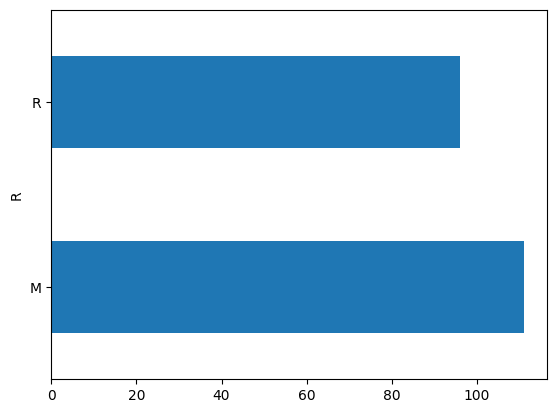

In [66]:
main_df.iloc[:, 60].value_counts().plot(kind='barh')


In [67]:
y_df = main_df.iloc[:, 60]
targes_label = {'M': 1,'R': -1}
targes_df = [targes_label[item] for item in y_df]
print(targes_df)

[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [68]:
inputs_df = main_df.drop(main_df.columns[60], axis=1)


In [69]:
x0 = np.ones(( inputs_df.shape[0], 1))
X = np.concatenate((x0, inputs_df), axis = 1)

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, targes_df, test_size=0.30,
random_state=42)

####Bài tập tự thực hành:

In [71]:
# Hàm h(x) và điều kiện hội tụ
def h(w, x):
    return np.sign(np.dot(w.T, x))

def has_converged(X, y, w):
    return np.array_equal(h(w, X), y)

# Perceptron Learning Algorithm
def perceptron(X, y, w_init):
    w = [w_init]
    N = X.shape[1]
    while True:
        for i in range(N):
            xi = X[:, i].reshape(X.shape[0], 1)
            yi = y[0, i]
            if h(w[-1], xi)[0] != yi:
                w_new = w[-1] + yi * xi
                w.append(w_new)
        if has_converged(X, y, w[-1]):
            break
    return w

# Chuyển về dạng cần thiết cho perceptron
X_train_T = X_train.T
y_train_T = np.array(y_train).reshape(1, -1)


# Huấn luyện
w_init = np.random.randn(X_train_T.shape[0], 1)
w = perceptron(X_train_T, y_train_T, w_init)

In [72]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Sử dụng trọng số cuối cùng để dự đoán
y_pred = h(w[-1], X_test.T).flatten()

# Đổi nhãn từ {-1, 1} về gốc nếu cần
y_true = np.array(y_test).flatten()

# Đánh giá
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)

print(f"Perceptron:\nAccuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}")


Perceptron:
Accuracy: 0.75, Precision: 0.81, Recall: 0.72


In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import time

# Logistic Regression
start = time.time()
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)
log_time = time.time() - start

# Naive Bayes
start = time.time()
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)
nb_time = time.time() - start

# Evaluation
def eval_model(name, y_true, y_pred, t):
    print(f"{name}:\n  Accuracy: {accuracy_score(y_true, y_pred):.2f}\n"
          f"  Precision: {precision_score(y_true, y_pred):.2f}\n"
          f"  Recall: {recall_score(y_true, y_pred):.2f}\n"
          f"  Time: {t:.4f}s\n")

eval_model("Logistic Regression", y_test, log_pred, log_time)
eval_model("Naive Bayes", y_test, nb_pred, nb_time)


Logistic Regression:
  Accuracy: 0.75
  Precision: 0.86
  Recall: 0.67
  Time: 0.0111s

Naive Bayes:
  Accuracy: 0.63
  Precision: 0.74
  Recall: 0.56
  Time: 0.0038s



####Ví dụ 3

In [74]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Tải dữ liệu ung thư vú
cancer_data = datasets.load_breast_cancer()

# Kiểm tra dữ liệu
print(cancer_data.data[5])  # Dữ liệu mẫu thứ 5
print(cancer_data.data.shape)  # Kích thước của dữ liệu

# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(cancer_data.data, cancer_data.target, test_size=0.3, random_state=109)

X_train.shape, X_test.shape, len(y_train), len(y_test)
print("Kich thuoc cua X_train", X_train.shape)
print("Kich thuoc cua X_test", X_test.shape)
print("Kich thuoc cua y_train", len(y_train))
print("Kich thuoc cua y_test", len(y_test))

[1.245e+01 1.570e+01 8.257e+01 4.771e+02 1.278e-01 1.700e-01 1.578e-01
 8.089e-02 2.087e-01 7.613e-02 3.345e-01 8.902e-01 2.217e+00 2.719e+01
 7.510e-03 3.345e-02 3.672e-02 1.137e-02 2.165e-02 5.082e-03 1.547e+01
 2.375e+01 1.034e+02 7.416e+02 1.791e-01 5.249e-01 5.355e-01 1.741e-01
 3.985e-01 1.244e-01]
(569, 30)
Kich thuoc cua X_train (398, 30)
Kich thuoc cua X_test (171, 30)
Kich thuoc cua y_train 398
Kich thuoc cua y_test 171


####Bài tập tự thực hành:

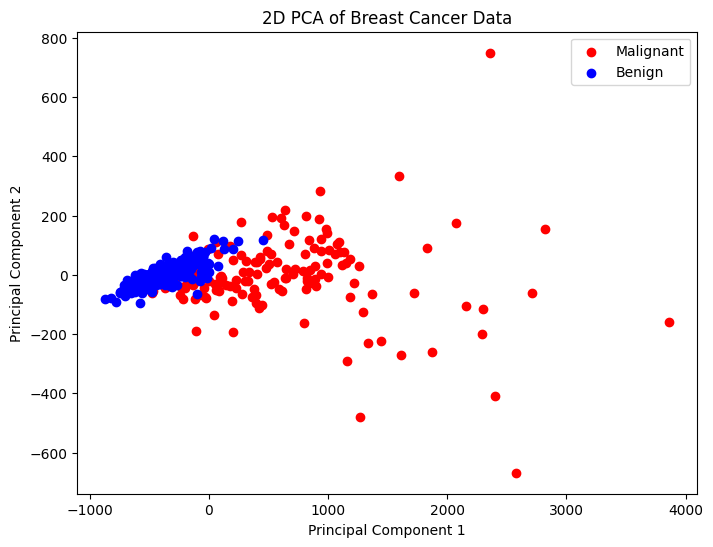

In [75]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Giảm chiều dữ liệu xuống còn 2 chiều bằng PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Hiển thị dữ liệu đã giảm chiều
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[y_train == 0, 0], X_train_pca[y_train == 0, 1], color='red', label='Malignant')
plt.scatter(X_train_pca[y_train == 1, 0], X_train_pca[y_train == 1, 1], color='blue', label='Benign')
plt.title('2D PCA of Breast Cancer Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


In [76]:
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.metrics import accuracy_score, precision_score, recall_score
from time import time

# Logistic Regression
log_reg_model = LogisticRegression(random_state=42)
start_time = time()
log_reg_model.fit(X_train_pca, y_train)
log_reg_time = time() - start_time

# Dự đoán và tính toán các chỉ số
y_pred_log_reg = log_reg_model.predict(X_test_pca)
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)
log_reg_precision = precision_score(y_test, y_pred_log_reg)
log_reg_recall = recall_score(y_test, y_pred_log_reg)

# Perceptron
perceptron_model = Perceptron(random_state=42)
start_time = time()
perceptron_model.fit(X_train_pca, y_train)
perceptron_time = time() - start_time

# Dự đoán và tính toán các chỉ số
y_pred_perceptron = perceptron_model.predict(X_test_pca)
perceptron_accuracy = accuracy_score(y_test, y_pred_perceptron)
perceptron_precision = precision_score(y_test, y_pred_perceptron)
perceptron_recall = recall_score(y_test, y_pred_perceptron)

log_reg_time, log_reg_accuracy, log_reg_precision, log_reg_recall, perceptron_time, perceptron_accuracy, perceptron_precision, perceptron_recall
print("Logistic Regression:")
print("Time:", log_reg_time)
print("Accuracy:", log_reg_accuracy)
print("Precision:", log_reg_precision)
print("Recall:", log_reg_recall)

print("\nPerceptron:")
print("Time:", perceptron_time)
print("Accuracy:", perceptron_accuracy)
print("Precision:", perceptron_precision)
print("Recall:", perceptron_recall)

Logistic Regression:
Time: 0.023162364959716797
Accuracy: 0.9649122807017544
Precision: 0.9636363636363636
Recall: 0.9814814814814815

Perceptron:
Time: 0.001974344253540039
Accuracy: 0.9415204678362573
Precision: 0.9298245614035088
Recall: 0.9814814814814815


####Ví dụ 4 (Bài tập tự thực hành)

In [77]:
import pandas as pd

# Đọc dữ liệu từ tệp CSV
file_path = '/content/framingham.csv'
df = pd.read_csv(file_path)

# Kiểm tra thông tin dữ liệu
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [78]:
# Kiểm tra các giá trị thiếu trong dữ liệu
df.isnull().sum()

# Xử lý giá trị thiếu, có thể thay thế bằng giá trị trung bình hoặc loại bỏ
df.fillna(df.mean(), inplace=True)

# Kiểm tra lại sau khi xử lý
df.isnull().sum()


,0
male,0
age,0
education,0
currentSmoker,0
cigsPerDay,0
BPMeds,0
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,0


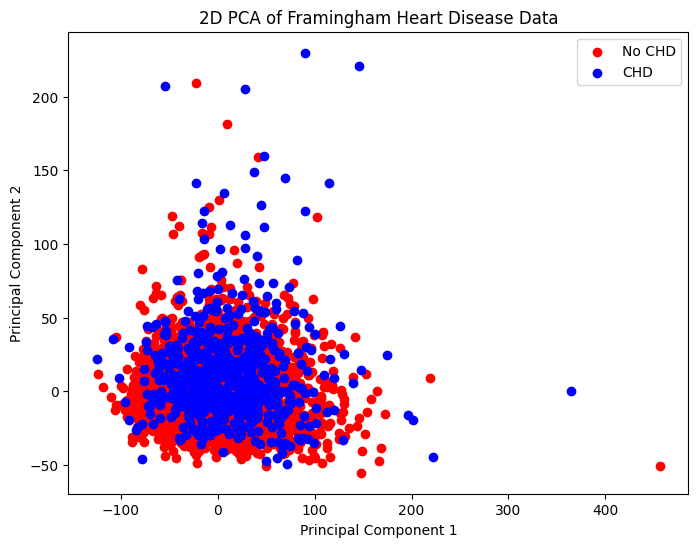

In [79]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Tách các tính năng và nhãn (target)
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

# Giảm chiều dữ liệu xuống còn 2 chiều
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Hiển thị dữ liệu đã giảm chiều
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], color='red', label='No CHD')
plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], color='blue', label='CHD')
plt.title('2D PCA of Framingham Heart Disease Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


In [80]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Chia dữ liệu thành tập huấn luyện và kiểm tra (train:test = 7:3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Huấn luyện mô hình Perceptron
perceptron_model = Perceptron(random_state=42)
perceptron_model.fit(X_train, y_train)
y_pred_perceptron = perceptron_model.predict(X_test)

# Tính toán các độ đo cho Perceptron
accuracy_perceptron = accuracy_score(y_test, y_pred_perceptron)
precision_perceptron = precision_score(y_test, y_pred_perceptron)
recall_perceptron = recall_score(y_test, y_pred_perceptron)

# Huấn luyện mô hình Logistic Regression
log_reg_model = LogisticRegression(random_state=42)
log_reg_model.fit(X_train, y_train)
y_pred_log_reg = log_reg_model.predict(X_test)

# Tính toán các độ đo cho Logistic Regression
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg)
recall_log_reg = recall_score(y_test, y_pred_log_reg)

# Huấn luyện mô hình Naïve Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

# Tính toán các độ đo cho Naïve Bayes
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)

# In ra các kết quả
accuracy_perceptron, precision_perceptron, recall_perceptron, accuracy_log_reg, precision_log_reg, recall_log_reg, accuracy_nb, precision_nb, recall_nb
print("Perceptron:")
print("Accuracy:", accuracy_perceptron)
print("Precision:", precision_perceptron)
print("Recall:", recall_perceptron)

print("\nLogistic Regression:")
print("Accuracy:", accuracy_log_reg)
print("Precision:", precision_log_reg)
print("Recall:", recall_log_reg)

print("\nNaïve Bayes:")
print("Accuracy:", accuracy_nb)
print("Precision:", precision_nb)
print("Recall:", recall_nb)

Perceptron:
Accuracy: 0.7877358490566038
Precision: 0.2857142857142857
Recall: 0.2564102564102564

Logistic Regression:
Accuracy: 0.8498427672955975
Precision: 0.75
Recall: 0.03076923076923077

Naïve Bayes:
Accuracy: 0.8286163522012578
Precision: 0.3963963963963964
Recall: 0.22564102564102564


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [81]:
# Chia dữ liệu giảm chiều thành tập huấn luyện và kiểm tra
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Huấn luyện và đánh giá mô hình trên dữ liệu đã giảm chiều
# Perceptron
perceptron_model.fit(X_train_pca, y_train_pca)
y_pred_perceptron_pca = perceptron_model.predict(X_test_pca)
accuracy_perceptron_pca = accuracy_score(y_test_pca, y_pred_perceptron_pca)
precision_perceptron_pca = precision_score(y_test_pca, y_pred_perceptron_pca)
recall_perceptron_pca = recall_score(y_test_pca, y_pred_perceptron_pca)

# Logistic Regression
log_reg_model.fit(X_train_pca, y_train_pca)
y_pred_log_reg_pca = log_reg_model.predict(X_test_pca)
accuracy_log_reg_pca = accuracy_score(y_test_pca, y_pred_log_reg_pca)
precision_log_reg_pca = precision_score(y_test_pca, y_pred_log_reg_pca)
recall_log_reg_pca = recall_score(y_test_pca, y_pred_log_reg_pca)

# Naïve Bayes
nb_model.fit(X_train_pca, y_train_pca)
y_pred_nb_pca = nb_model.predict(X_test_pca)
accuracy_nb_pca = accuracy_score(y_test_pca, y_pred_nb_pca)
precision_nb_pca = precision_score(y_test_pca, y_pred_nb_pca)
recall_nb_pca = recall_score(y_test_pca, y_pred_nb_pca)

# In kết quả
accuracy_perceptron_pca, precision_perceptron_pca, recall_perceptron_pca, accuracy_log_reg_pca, precision_log_reg_pca, recall_log_reg_pca, accuracy_nb_pca, precision_nb_pca, recall_nb_pca
print("Perceptron (PCA):")
print("Accuracy:", accuracy_perceptron_pca)
print("Precision:", precision_perceptron_pca)
print("Recall:", recall_perceptron_pca)

print("\nLogistic Regression (PCA):")
print("Accuracy:", accuracy_log_reg_pca)
print("Precision:", precision_log_reg_pca)
print("Recall:", recall_log_reg_pca)

print("\nNaïve Bayes (PCA):")
print("Accuracy:", accuracy_nb_pca)
print("Precision:", precision_nb_pca)
print("Recall:", recall_nb_pca)

Perceptron (PCA):
Accuracy: 0.7492138364779874
Precision: 0.20476190476190476
Recall: 0.2205128205128205

Logistic Regression (PCA):
Accuracy: 0.8490566037735849
Precision: 0.6363636363636364
Recall: 0.035897435897435895

Naïve Bayes (PCA):
Accuracy: 0.8490566037735849
Precision: 0.5384615384615384
Recall: 0.1076923076923077


####Ví dụ 5 (Bài tập tự thực hành)

In [82]:
import pandas as pd

# Đọc dữ liệu từ tệp CSV
file_path = '/content/Analysis-Portfolio-Task-Data.csv'
df = pd.read_csv(file_path)

# Kiểm tra thông tin dữ liệu
df.head()


,CustomerID,Shopping Basket,Gender,Age,Store Type,Value Products,Brand Products,Top Fresco Products
0,20358063,48.81,Male,26,Convenient Stores,8,2,1
1,24635139,33.44,Female,33,Superstore,6,5,1
2,27584479,131.57,Male,56,Online,35,8,12
3,28008212,20.02,Male,27,Convenient Stores,0,1,1
4,29130973,95.54,Female,55,Online,38,18,20


In [83]:
# Mã hóa cột Gender (male -> 1, female -> 0)
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

# One-Hot Encoding cho cột Store Type (convenience stores, superstores, online)
df = pd.get_dummies(df, columns=['Store Type'], drop_first=True)

# Kiểm tra lại dữ liệu sau khi xử lý
df.head()


,CustomerID,Shopping Basket,Gender,Age,Value Products,Brand Products,Top Fresco Products,Store Type_Online,Store Type_Superstore
0,20358063,48.81,1,26,8,2,1,False,False
1,24635139,33.44,0,33,6,5,1,False,True
2,27584479,131.57,1,56,35,8,12,True,False
3,28008212,20.02,1,27,0,1,1,False,False
4,29130973,95.54,0,55,38,18,20,True,False


In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Tách dữ liệu đầu vào (X) và đầu ra (y)
X = df.drop(columns=['CustomerID', 'Shopping Basket'])
y = df['Shopping Basket']

# Chia dữ liệu thành tập huấn luyện (60%) và kiểm tra (15%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Huấn luyện mô hình hồi quy tuyến tính
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)

# Dự đoán và tính toán độ chính xác (MSE)
y_pred = lin_reg_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

# In các hệ số và kết quả
lin_reg_model.coef_, lin_reg_model.intercept_, mse
print("Coefficients:", lin_reg_model.coef_)
print("Intercept:", lin_reg_model.intercept_)
print("Mean Squared Error:", mse)

Coefficients: [-5.84360375  0.11400975  0.91933103  0.7281105   2.73873533 23.60963212
  9.05079138]
Intercept: 8.8715012435379
Mean Squared Error: 490.1188658767935


In [85]:
# Chuyển đổi Shopping Basket thành lớp phân loại
y_class = (df['Shopping Basket'] > 50).astype(int)  # class 1 nếu > 50, class 0 nếu <= 50

# Chia lại dữ liệu thành tập huấn luyện và kiểm tra
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.20, random_state=42)

# 1. Perceptron
from sklearn.linear_model import Perceptron
perceptron_model = Perceptron(random_state=42)
perceptron_model.fit(X_train_class, y_train_class)
y_pred_perceptron = perceptron_model.predict(X_test_class)

# 2. Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg_model = LogisticRegression(random_state=42)
log_reg_model.fit(X_train_class, y_train_class)
y_pred_log_reg = log_reg_model.predict(X_test_class)

# 3. Naïve Bayes
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train_class, y_train_class)
y_pred_nb = nb_model.predict(X_test_class)

# Đánh giá kết quả
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy_perceptron = accuracy_score(y_test_class, y_pred_perceptron)
precision_perceptron = precision_score(y_test_class, y_pred_perceptron)
recall_perceptron = recall_score(y_test_class, y_pred_perceptron)

accuracy_log_reg = accuracy_score(y_test_class, y_pred_log_reg)
precision_log_reg = precision_score(y_test_class, y_pred_log_reg)
recall_log_reg = recall_score(y_test_class, y_pred_log_reg)

accuracy_nb = accuracy_score(y_test_class, y_pred_nb)
precision_nb = precision_score(y_test_class, y_pred_nb)
recall_nb = recall_score(y_test_class, y_pred_nb)

accuracy_perceptron, precision_perceptron, recall_perceptron, accuracy_log_reg, precision_log_reg, recall_log_reg, accuracy_nb, precision_nb, recall_nb
print("Perceptron:")
print("Accuracy:", accuracy_perceptron)
print("Precision:", precision_perceptron)
print("Recall:", recall_perceptron)

print("\nLogistic Regression:")
print("Accuracy:", accuracy_log_reg)
print("Precision:", precision_log_reg)
print("Recall:", recall_log_reg)

print("\nNaïve Bayes:")
print("Accuracy:", accuracy_nb)
print("Precision:", precision_nb)
print("Recall:", recall_nb)

print("Mô hình Logistic có kết quả tốt nhất, sau đó tới perceptron")

Perceptron:
Accuracy: 0.6
Precision: 0.6
Recall: 1.0

Logistic Regression:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0

Naïve Bayes:
Accuracy: 0.8
Precision: 1.0
Recall: 0.6666666666666666
Mô hình Logistic có kết quả tốt nhất, sau đó tới perceptron
